In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
import seaborn as sns # type: ignore
import math
# from scipy import stats
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./penguins.csv')

In [5]:
df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [6]:
print(df.shape)

(344, 10)


In [7]:
df.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [8]:
print(df.describe())

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB
None


In [11]:
categorical = df.select_dtypes(include=['object']).columns


In [12]:
numerical = df.select_dtypes(include=['int64','float64']).columns


In [13]:
print(f"Categorical columns: {categorical}")
print(f"Numerical columns: {numerical}")

Categorical columns: Index(['species', 'island', 'gender'], dtype='object')
Numerical columns: Index(['calorie requirement', 'average sleep duration', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')


In [14]:
print(df.isnull().sum())

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64


### Droping
Since the null values are in less numbers, we will not execute this.

In [15]:
print("Unique values in each column ",df.nunique())

Unique values in each column  species                     8
island                      8
calorie requirement       333
average sleep duration      8
bill_length_mm            172
bill_depth_mm              83
flipper_length_mm          60
body_mass_g                97
gender                      4
year                        3
dtype: int64


In [16]:
for i in df.select_dtypes(include=['object']).columns:
        mode_value = df[i].mode()[0]
        df[i].fillna(mode_value,inplace=True)

for i in df.select_dtypes(include=['int64','float64']).columns:
        mean = df[i].mean()
        df[i].fillna(math.ceil(mean),inplace=True)


In [17]:
df.isnull().sum()

species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64

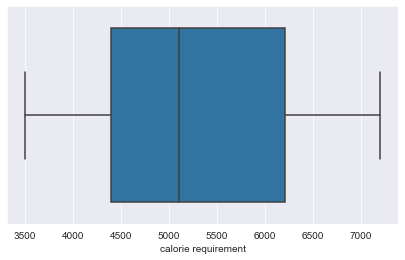

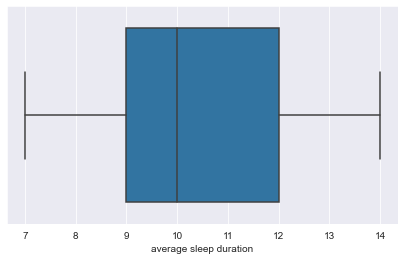

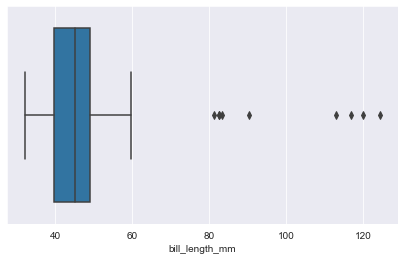

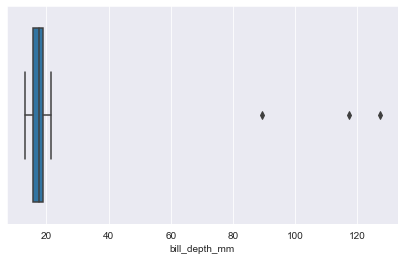

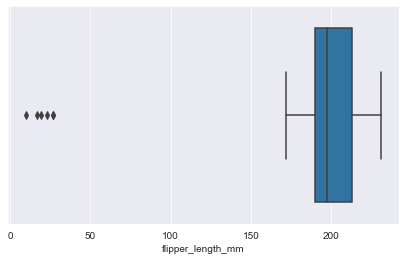

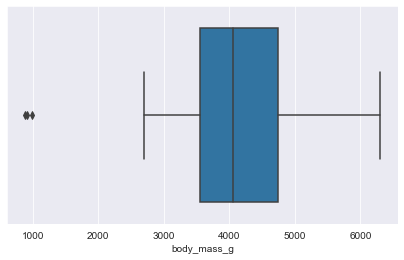

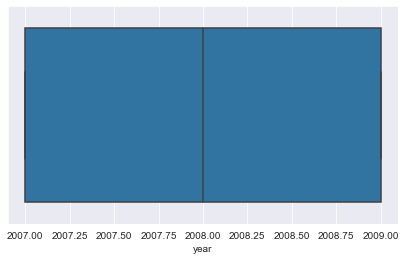

In [18]:
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])
    plt.show()

In [19]:
df_zscore = df.copy()
for i in df.select_dtypes(include=['int64','float64']).columns:
  z_score_column = i + '_z-score'
  df_zscore[z_score_column] = (df[i] - df[i].mean()) / df[i].std()


In [20]:
df_zscore.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,calorie requirement_z-score,average sleep duration_z-score,bill_length_mm_z-score,bill_depth_mm_z-score,flipper_length_mm_z-score,body_mass_g_z-score,year_z-score
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0,1.210718,0.243756,-0.598267,0.071511,-0.611191,-0.499126,-1.272466
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0,-0.355822,1.567736,-0.560902,-0.071447,-0.428967,-0.440471,-1.272466
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0,1.792201,0.243756,-0.486171,-0.005466,-0.100965,-1.085684,-1.272466
3,Adelie,Torgersen,4169,8,46.0,19.0,198.0,992.0,male,2007.0,-1.030941,-1.080224,0.046286,0.104501,0.008370,-3.734577,-1.272466
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0,-0.464440,-1.080224,-0.822460,0.137491,-0.173854,-0.851061,-1.272466


In [21]:
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3]
    print(f"Number of outliers in {i}: {len(outliers)}")


Number of outliers in calorie requirement_z-score: 0
Number of outliers in average sleep duration_z-score: 0
Number of outliers in bill_length_mm_z-score: 9
Number of outliers in bill_depth_mm_z-score: 3
Number of outliers in flipper_length_mm_z-score: 0
Number of outliers in body_mass_g_z-score: 0
Number of outliers in year_z-score: 0


In [22]:
df.loc[df_zscore['bill_length_mm_z-score'] > 3].head(10)


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
17,adelie,Torgersen,6543,8,82.40,20.7,197.0,4500.0,male,2007.0
21,Adelie,Biscoe,4138,8,82.47,18.7,180.0,3600.0,male,2007.0
72,Adelie,torgersen,3955,12,119.89,17.2,196.0,4176.0,male,2008.0
92,Adelie,Dream,4612,12,81.10,17.1,27.0,3400.0,female,2008.0
147,Adelie,Biscoe,6356,10,124.30,18.4,184.0,3475.0,male,2009.0
210,gentoo,Biscoe,4985,11,90.30,14.5,208.0,4450.0,female,2008.0
279,CHINSTRAP,Biscoe,5337,9,116.67,18.7,198.0,3525.0,female,2007.0
322,Chinstrap,Dream,3802,9,83.27,17.9,19.0,3400.0,female,2009.0
335,chinstrap,DREAM,7195,13,112.75,19.4,194.0,3525.0,female,2009.0


In [23]:
df.loc[df_zscore['bill_depth_mm_z-score'] > 3].head(10)


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
36,Adelie,Dream,3758,7,38.8,89.21,190.0,3950.0,male,2007.0
116,Adelie,Torgersen,5580,12,46.0,117.23,188.0,2900.0,FEMALE,2009.0
161,gentoo,biscoe,4743,12,46.8,127.26,215.0,5150.0,male,2007.0


In [24]:
df_zscore = df_zscore.drop(df_zscore.loc[df_zscore['bill_length_mm_z-score'] > 3].index)
df_zscore = df_zscore.drop(df_zscore.loc[df_zscore['bill_depth_mm_z-score'] > 3].index)

In [25]:
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3]
    print(f"Number of outliers in {i}: {len(outliers)}")

Number of outliers in calorie requirement_z-score: 0
Number of outliers in average sleep duration_z-score: 0
Number of outliers in bill_length_mm_z-score: 0
Number of outliers in bill_depth_mm_z-score: 0
Number of outliers in flipper_length_mm_z-score: 0
Number of outliers in body_mass_g_z-score: 0
Number of outliers in year_z-score: 0


In [26]:
df_zscore = df_zscore.drop(columns=[col for col in df_zscore.columns if col.endswith('_z-score')])

In [27]:
df_zscore.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,46.0,19.0,198.0,992.0,male,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [28]:
df_outlier_free = df_zscore.copy()

In [29]:
df_outlier_free.shape

(332, 10)

In [30]:
df_outlier_free['species']=df_outlier_free['species'].str.upper()

In [31]:
df_outlier_free['island']=df_outlier_free['island'].str.upper()

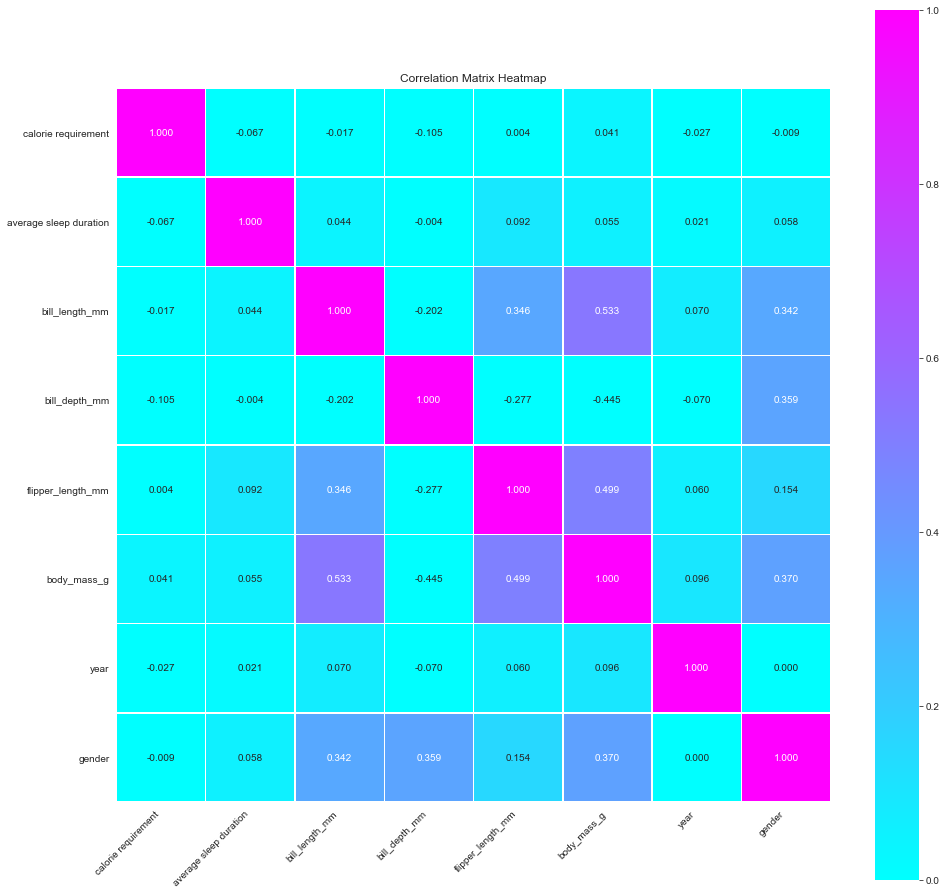

In [38]:
# finding correlation between target variable and numerical variables 
df_correlation = df_outlier_free.copy()
df_correlation['gender'] = df_correlation['gender'].apply(lambda x: 1 if x.lower() == 'male' else 0)
columnOrder = [x for x in df_correlation.columns if x != "gender"] + ["gender"]
df_correlation = df_correlation[columnOrder]
correlation_matrix = df_correlation.corr()
plt.figure(figsize=(16, 16))

sns.heatmap(correlation_matrix, 
            annot=True,        
            cmap='cool',  
            vmin=0, vmax=1,  
            linewidths=0.5,  
            square=True,
            fmt='.3f')    
plt.xticks(rotation=45, ha='right') 
# plt.tight_layout()
plt.title('Correlation Matrix Heatmap')
plt.show()

In [39]:
# Reference : gishnuma_assignmen0_final.ipnb
df_groupby_species = df_outlier_free.groupby('species').size()

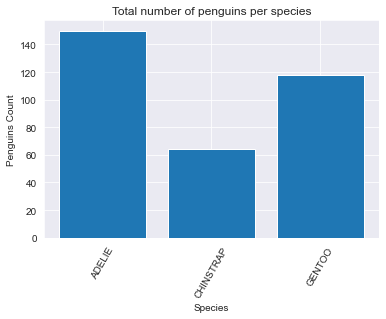

In [41]:
plt.bar(df_groupby_species.index,df_groupby_species.values)
plt.xlabel('Species')
plt.ylabel('Penguins Count')
plt.title('Total number of penguins per species')
plt.xticks(rotation=60)
plt.show()

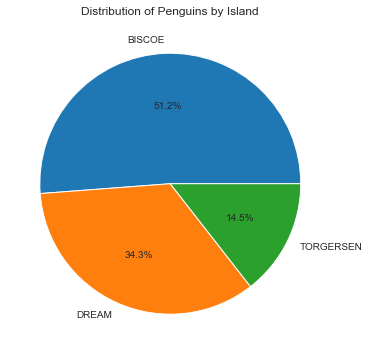

In [42]:
island_counts = df_outlier_free['island'].value_counts().sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(island_counts, labels=island_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Penguins by Island")
plt.show()

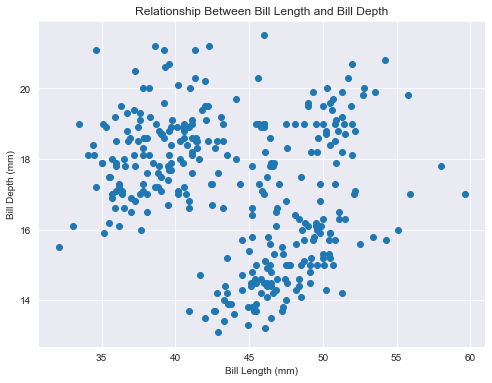

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(df_outlier_free["bill_length_mm"], df_outlier_free["bill_depth_mm"])
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Relationship Between Bill Length and Bill Depth")
plt.grid(True)
plt.show()

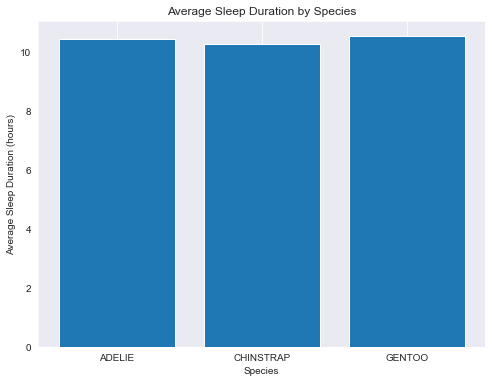

In [44]:
avg_sleep_by_species = df_outlier_free.groupby('species')['average sleep duration'].mean()

# Bar graph for average sleep duration by species
plt.figure(figsize=(8, 6))
plt.bar(avg_sleep_by_species.index, avg_sleep_by_species.values)
plt.xlabel("Species")
plt.ylabel("Average Sleep Duration (hours)")
plt.title("Average Sleep Duration by Species")
plt.grid(axis='y')
plt.show()

In [45]:
df_outlier_free.to_csv('penguins_cleaned_itr1.csv',index=False)

We will take gender as the target. therefore dropping it before we conduct encoding

In [46]:
categorical_columns=categorical.drop('gender')

In [47]:
df_encoded = pd.get_dummies(df_outlier_free, columns=categorical_columns)

In [48]:
df_encoded.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,species_ADELIE,species_CHINSTRAP,species_GENTOO,island_BISCOE,island_DREAM,island_TORGERSEN
0,6563,11,39.1,18.7,181.0,3750.0,male,2007.0,1,0,0,0,0,1
1,4890,14,39.5,17.4,186.0,3800.0,female,2007.0,1,0,0,0,0,1
2,7184,11,40.3,18.0,195.0,3250.0,female,2007.0,1,0,0,0,0,1
3,4169,8,46.0,19.0,198.0,992.0,male,2007.0,1,0,0,0,0,1
4,4774,8,36.7,19.3,193.0,3450.0,female,2007.0,1,0,0,0,0,1


In [49]:
df_encoded.shape

(332, 14)

In [50]:
df_encoded.to_csv('penguins_cleaned_string_encoded.csv', index=False)

In [51]:
df_normalized = df_outlier_free.get(numerical)

In [52]:
df_normalized.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,6563,11,39.1,18.7,181.0,3750.0,2007.0
1,4890,14,39.5,17.4,186.0,3800.0,2007.0
2,7184,11,40.3,18.0,195.0,3250.0,2007.0
3,4169,8,46.0,19.0,198.0,992.0,2007.0
4,4774,8,36.7,19.3,193.0,3450.0,2007.0


In [53]:
min_values = df_normalized.min()
max_values = df_normalized.max()

In [54]:
normalized_df = (df_normalized - min_values) / (max_values - min_values)

In [55]:
normalized_df.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0.828324,0.571429,0.254545,0.666667,0.773756,0.529347,0.0
1,0.375305,1.000000,0.269091,0.511905,0.796380,0.538575,0.0
2,0.996480,0.571429,0.298182,0.583333,0.837104,0.437062,0.0
3,0.180070,0.142857,0.505455,0.702381,0.850679,0.020303,0.0
4,0.343894,0.142857,0.167273,0.738095,0.828054,0.473976,0.0


In [56]:
pre_processed_df = pd.concat([normalized_df,df_encoded.iloc[:,8:],df_encoded['gender']], axis=1)

In [58]:
pre_processed_df.head()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_ADELIE,species_CHINSTRAP,species_GENTOO,island_BISCOE,island_DREAM,island_TORGERSEN,gender
0,0.828324,0.571429,0.254545,0.666667,0.773756,0.529347,0.0,1,0,0,0,0,1,male
1,0.375305,1.000000,0.269091,0.511905,0.796380,0.538575,0.0,1,0,0,0,0,1,female
2,0.996480,0.571429,0.298182,0.583333,0.837104,0.437062,0.0,1,0,0,0,0,1,female
3,0.180070,0.142857,0.505455,0.702381,0.850679,0.020303,0.0,1,0,0,0,0,1,male
4,0.343894,0.142857,0.167273,0.738095,0.828054,0.473976,0.0,1,0,0,0,0,1,female


In [60]:
pre_processed_df.to_csv('penguins_preprocessed.csv', index=False)